Fisher's linear discriminant:

\begin{align*}
\mathbf{w} \propto S_W^{-1} (\mathbf{m}_2 - \mathbf{m}_1)
\end{align*}

where

* $S_W = \sum_{n \in \mathcal{C}_1} (\mathbf{x}_i - \mathbf{m}_1) (\mathbf{x}_i - \mathbf{m}_1)^T + \sum_{i \in \mathcal{C}_2} (\mathbf{x}_i - \mathbf{m}_2) (\mathbf{x}_i - \mathbf{m}_2)^T $, i.e. the sum of with-in class variance.
* $\mathbf{m}_k = \frac{1}{N_k} \sum_{i \in \mathcal{C}_k} \mathbf{x}_i$, i.e. the class mean. $N_k$ is the number of examples in class $k$.

Generate some data,

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

In [2]:
np.random.seed(123)

In [3]:
N1 = 100
N2 = 500

df = pd.concat(
    [
        pd.DataFrame(
            np.random.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 2]], size=N1),
            columns=["x1", "x2"],
        ).assign(target=0),
        pd.DataFrame(
            np.random.multivariate_normal(mean=[-5, 0], cov=[[2, 1.5], [1.5, 2]], size=N2),
            columns=["x1", "x2"],
        ).assign(target=1),
    ]
).reset_index()

In [4]:
X1 = df.loc[lambda df: df.target == 0][['x1', 'x2']].values
X2 = df.loc[lambda df: df.target == 1][['x1', 'x2']].values
m1 = X1.T.mean(axis=1, keepdims=True)
m2 = X2.T.mean(axis=1, keepdims=True)

In [5]:
alt.Chart(df).mark_point().encode(x='x1', y='x2', color='target:N')

alt.Chart(...)

In [6]:
S_W_inv = np.linalg.inv(np.cov(X1.T) * (N1 - 1) + np.cov(X2.T) * (N2 - 1))

In [7]:
S_W_inv

array([[ 0.00163747, -0.00116953],
       [-0.00116953,  0.00167353]])

In [8]:
weights = S_W_inv @ (m1 - m2)

In [9]:
weights

array([[ 0.00829466],
       [-0.00618318]])

In [10]:
def make_bins(vals):
    mi = np.min(vals)
    ma = np.max(vals)
    return np.linspace(mi, ma, 50)

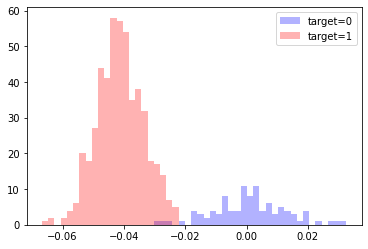

In [11]:
proj_X1 = (weights.T @ X1.T).ravel()
proj_X2 = (weights.T @ X2.T).ravel()
bins = make_bins(np.concatenate([proj_X1, proj_X2]))
plt.hist(proj_X1, bins=bins, color='blue', label='target=0', alpha=0.3)
plt.hist(proj_X2, bins=bins, color='red', label='target=1', alpha=0.3)
plt.legend()

In [12]:
df = pd.concat([
    pd.DataFrame(proj_X1, columns=['val']).assign(target=0),
    pd.DataFrame(proj_X2, columns=['val']).assign(target=1)
])

Just replot the same thing with Altair

In [13]:
alt.Chart(df).mark_area(opacity=0.3, interpolate="step").encode(
    x=alt.X("val:Q", bin=alt.Bin(maxbins=50)),
    y=alt.Y("count()", stack=None),
    color="target:N",
)

alt.Chart(...)